# ANÁLISIS DE LA DERIVA

<code> Proyecto NOVELLA </code>

***

In [1]:
import pandas as pd

## Análisis variable respuesta

In [2]:
df_train = pd.read_csv('trainConGenresList.csv')
df_test = pd.read_csv('test_FINAL_EVALUACION.csv')
df_test_TRENDS_imputados = pd.read_csv('testConTrendsImputados.csv')

In [3]:
df_train.head()

,Unnamed: 0,Bestseller,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,Rating20Days,HasTwitter,HasWikipedia,PrevBestSellAuthor,GenresList
0,0,0.0,329.0,1.0,0.51,0.40,0,19.99,1.0,paperback,0.0,3.70,1.0,0.0,0.0,"['19th Century', 'Classics', 'France', 'French..."
1,1,0.0,269.0,2.0,0.61,0.54,1,3.99,2.0,ebook,0.0,3.89,1.0,1.0,0.0,"['Adventure', 'Classics', 'Fantasy', 'France',..."
2,2,0.0,2335.0,1.0,0.72,0.57,1,20.99,7.0,ebook,0.0,4.45,0.0,1.0,0.0,"['Childrens', 'Classics', 'Historical Fiction'..."
3,3,0.0,40.0,1.0,0.83,0.35,0,25.00,1.0,hardcover,0.0,4.30,1.0,1.0,0.0,"['Animals', 'Childrens', 'Classics', 'Fantasy'..."
4,4,0.0,189.0,1.0,0.59,0.26,0,15.00,4.0,paperback,0.0,3.80,0.0,1.0,0.0,"['American', 'Classics', 'Historical Fiction',..."


In [4]:
df_test.head()

,Unnamed: 0,Bestseller,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,...,Womens,Womens Fiction,World War I,World War II,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
0,0,0.0,548.0,1.0,0.32,0.27,1,24.30,2.0,ebook,...,0,0,0,0,1,0,0,0,0,0
1,1,0.0,304.0,1.0,0.80,0.29,0,10.99,3.0,hardcover,...,0,0,0,0,1,0,0,0,0,0
2,2,0.0,352.0,1.0,0.39,0.35,0,18.00,3.0,paperback,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,336.0,1.0,0.13,0.13,1,17.99,2.0,paperback,...,0,0,0,0,1,0,1,0,0,0
4,4,0.0,232.0,1.0,0.87,0.20,1,13.99,2.0,hardcover,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bs_train = df_train['Bestseller'].sum()
bs_test = df_test['Bestseller'].sum()

In [6]:
porc_bs_train = round(bs_train/len(df_train),3) *100
porc_bs_test = round(bs_test/len(df_test),3) *100

print(f'En los datos antiguos, el {porc_bs_train}% eran bestsellers.')
print(f'En los datos nuevos, el {porc_bs_test}% son bestsellers.')

En los datos antiguos, el 13.4% eran bestsellers.
En los datos nuevos, el 16.5% son bestsellers.


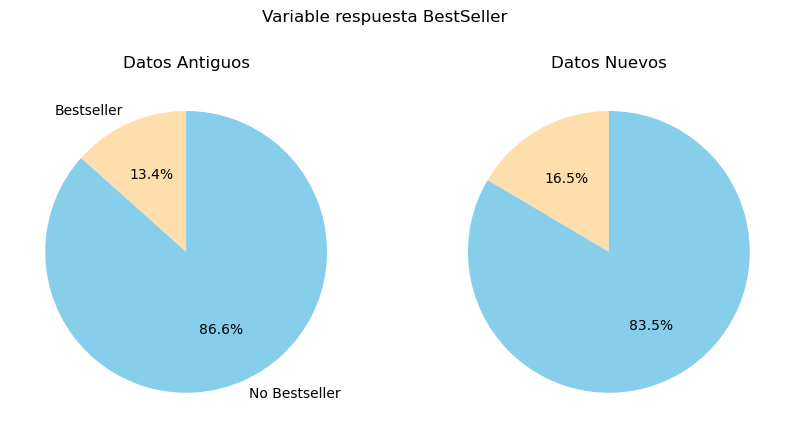

In [7]:
# Mostramos la diferencia gráficamente

import matplotlib.pyplot as plt

# Definimos los colores para todos los gráficos
c = ['NavajoWhite', 'Skyblue']

# Datos
labels = ['Bestseller', 'No Bestseller']
sizes_antiguos = [porc_bs_train, 100-porc_bs_train]
sizes_nuevos = [porc_bs_test, 100-porc_bs_test]

# Crear subplots con figura más grande
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Tamaño de la figura ajustado

# Gráfico para datos antiguos
axs[0].pie(sizes_antiguos, labels=labels, autopct='%1.1f%%', startangle=90, colors=c)
axs[0].set_title('Datos Antiguos')

# Gráfico para datos nuevos
axs[1].pie(sizes_nuevos, autopct='%1.1f%%', startangle=90, colors=c)
axs[1].set_title('Datos Nuevos')

plt.suptitle('Variable respuesta BestSeller')
plt.show()

## Análisis variables más relevantes para el modelo

In [8]:
from scipy.stats import mannwhitneyu

def realizarMWUTest(c1, c2):

    # Prueba de Mann-Whitney U
    stat, p = mannwhitneyu(c1, c2, alternative='two-sided')
    
    print ('\n--- Prueba de Mann-Whitney U ---\n')
    print('Estadístico U:', stat)
    print('Valor p:', p)

    if p < 0.05:
        print('Las muestras provienen de poblaciones diferentes (rechazamos la hipótesis nula)')
    else:
        print('No se puede rechazar que las muestras provienen de la misma población (no se rechaza la hipótesis nula)')

    print()

**HasWikipedia**

In [9]:
wiki_train = df_train['HasWikipedia'].sum()
wiki_test = df_test['HasWikipedia'].sum()

In [10]:
porc_wiki_train = round(wiki_train/len(df_train),3) *100
porc_wiki_test = round(wiki_test/len(df_test),3) *100

print(f'En los datos antiguos, el {porc_wiki_train}% de los autores tenían wikipedia.')
print(f'En los datos nuevos, el {porc_wiki_test}% de los autores tienen wikipedia.')

En los datos antiguos, el 47.4% de los autores tenían wikipedia.
En los datos nuevos, el 42.5% de los autores tienen wikipedia.


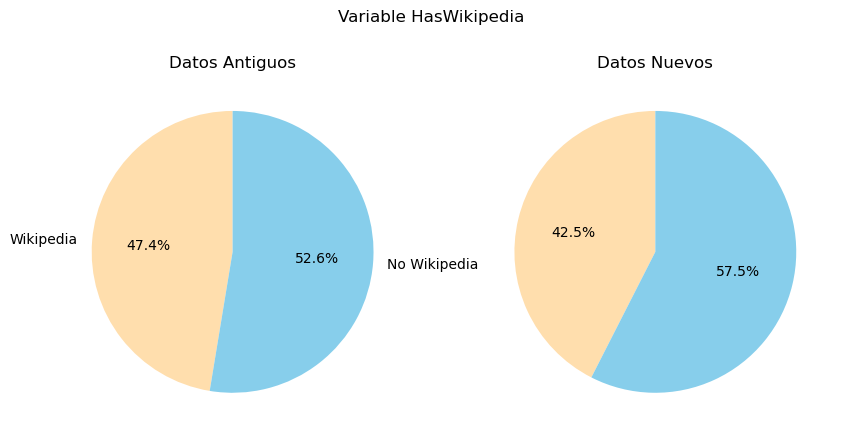

In [11]:
# Mostramos la diferencia gráficamente

import matplotlib.pyplot as plt

# Datos
labels = ['Wikipedia', 'No Wikipedia']
sizes_antiguos = [porc_wiki_train, 100-porc_wiki_train]
sizes_nuevos = [porc_wiki_test, 100-porc_wiki_test]

# Crear subplots con figura más grande
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Tamaño de la figura ajustado

# Gráfico para datos antiguos
axs[0].pie(sizes_antiguos, labels=labels, autopct='%1.1f%%', startangle=90, colors=c)
axs[0].set_title('Datos Antiguos')

# Gráfico para datos nuevos
axs[1].pie(sizes_nuevos, autopct='%1.1f%%', startangle=90, colors=c)
axs[1].set_title('Datos Nuevos')

plt.suptitle('Variable HasWikipedia')
plt.show()

**BookInterest1M**

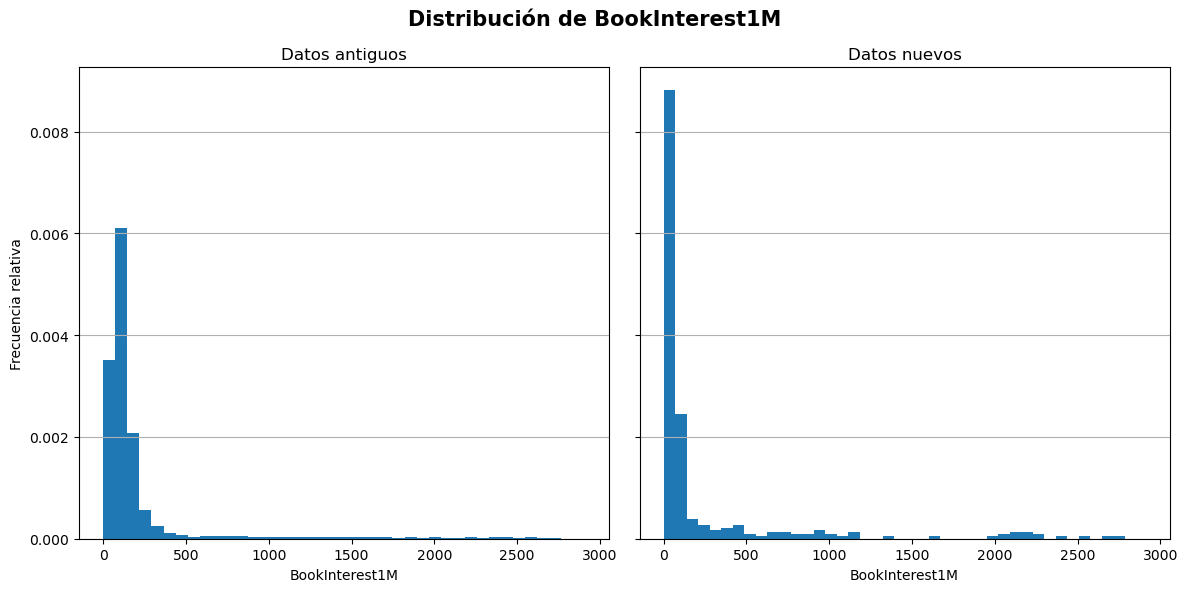

In [12]:
# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex = "all", sharey = "all")

# Histograma de frecuencia relativa para datos antiguos
nbins = 40

axs[0].hist(df_train['BookInterest1M'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[0].set_title('Datos antiguos')
axs[0].set_xlabel('BookInterest1M')
axs[0].set_ylabel('Frecuencia relativa')
axs[0].grid(axis='y')

# Histograma de frecuencia relativa para datos nuevos
axs[1].hist(df_test['BookInterest1M'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[1].set_title('Datos nuevos')
axs[1].set_xlabel('BookInterest1M')
axs[1].grid(axis='y')

plt.suptitle("Distribución de BookInterest1M", fontsize = 15, fontweight = "bold")
# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [13]:
# Análisis descriptivo

desc_train = df_train['BookInterest1M'].describe()
desc_test = df_test['BookInterest1M'].describe()

# Crear un DataFrame con los resultados
df_bookInterest = pd.DataFrame({'Datos antiguos': desc_train, 'Datos nuevos': desc_test})
df_bookInterest

,Datos antiguos,Datos nuevos
count,3620.000000,327.000000
mean,207.752762,216.290520
std,418.554462,517.436583
min,0.000000,0.000000
25%,0.000000,0.000000
50%,100.000000,0.000000
75%,176.000000,100.000000
max,2911.000000,2787.000000


In [14]:
BITrain = df_train['BookInterest1M']
BITest = df_test['BookInterest1M']
realizarMWUTest(BITrain, BITest)


--- Prueba de Mann-Whitney U ---

Estadístico U: 761912.5
Valor p: 1.2785460912809655e-19
Las muestras provienen de poblaciones diferentes (rechazamos la hipótesis nula)



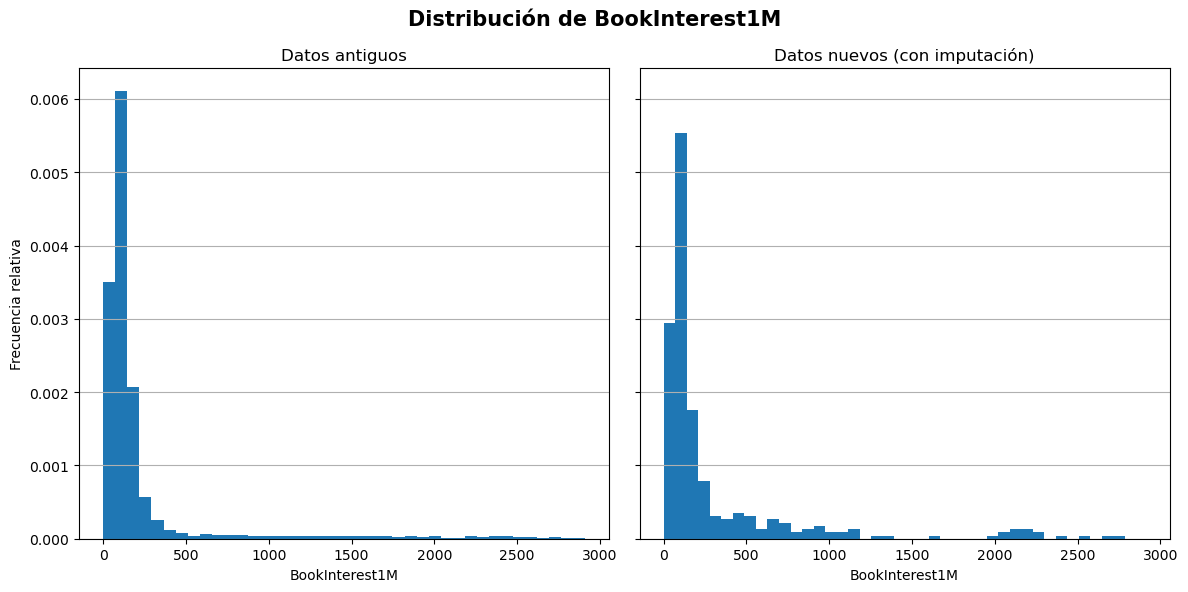

In [31]:
# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex = "all", sharey = "all")

# Histograma de frecuencia relativa para datos antiguos
nbins = 40

axs[0].hist(df_train['BookInterest1M'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[0].set_title('Datos antiguos')
axs[0].set_xlabel('BookInterest1M')
axs[0].set_ylabel('Frecuencia relativa')
axs[0].grid(axis='y')

# Histograma de frecuencia relativa para datos nuevos
axs[1].hist(df_test_TRENDS_imputados['BookInterest1M'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[1].set_title('Datos nuevos (con imputación)')
axs[1].set_xlabel('BookInterest1M')
axs[1].grid(axis='y')

plt.suptitle("Distribución de BookInterest1M", fontsize = 15, fontweight = "bold")
# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [16]:
# Análisis descriptivo

desc_train = df_train['BookInterest1M'].describe()
desc_test = df_test_TRENDS_imputados['BookInterest1M'].describe()

# Crear un DataFrame con los resultados
df_bookInterest = pd.DataFrame({'Datos antiguos': desc_train, 'Datos nuevos': desc_test})
df_bookInterest

,Datos antiguos,Datos nuevos
count,3620.000000,327.000000
mean,207.752762,313.385321
std,418.554462,501.090202
min,0.000000,0.000000
25%,0.000000,98.000000
50%,100.000000,118.000000
75%,176.000000,266.500000
max,2911.000000,2787.000000


In [17]:
BITrain = df_train['BookInterest1M']
BITest = df_test_TRENDS_imputados['BookInterest1M']
realizarMWUTest(BITrain, BITest)


--- Prueba de Mann-Whitney U ---

Estadístico U: 471957.5
Valor p: 1.979872148891808e-10
Las muestras provienen de poblaciones diferentes (rechazamos la hipótesis nula)



**PrevBestSellAuthor**

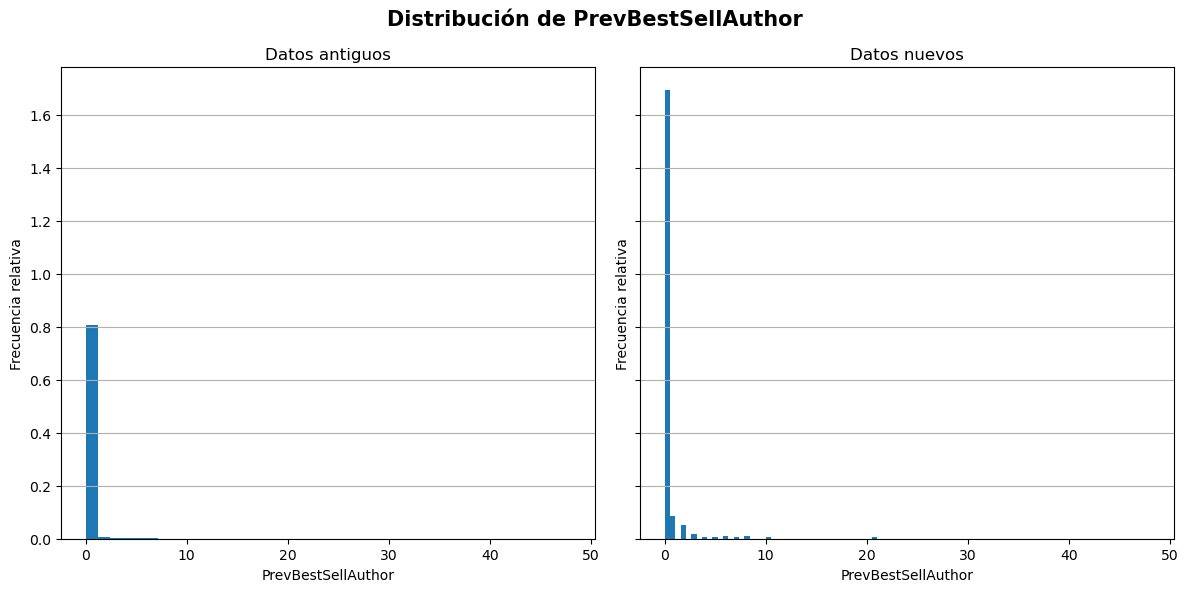

In [18]:
# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex = "all", sharey = "all")

# Histograma de frecuencia relativa para datos antiguos
nbins = 40

axs[0].hist(df_train['PrevBestSellAuthor'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[0].set_title('Datos antiguos')
axs[0].set_xlabel('PrevBestSellAuthor')
axs[0].set_ylabel('Frecuencia relativa')
axs[0].grid(axis='y')

# Histograma de frecuencia relativa para datos nuevos
axs[1].hist(df_test['PrevBestSellAuthor'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[1].set_title('Datos nuevos')
axs[1].set_xlabel('PrevBestSellAuthor')
axs[1].set_ylabel('Frecuencia relativa')
axs[1].grid(axis='y')
plt.suptitle("Distribución de PrevBestSellAuthor", fontsize = 15, fontweight = "bold")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [19]:
PVSTrain = df_train['PrevBestSellAuthor']
PVSTest = df_test['PrevBestSellAuthor']
realizarMWUTest(PVSTrain, PVSTest)


--- Prueba de Mann-Whitney U ---

Estadístico U: 567941.0
Valor p: 0.007250432202934451
Las muestras provienen de poblaciones diferentes (rechazamos la hipótesis nula)



Como hay una diferencia muy grande en la cantidad de libros con bestsellers previos y sin ellos, vamos a dividir el estudio de la variable en dos partes. Primero vamos a ver el porcentaje de libros cuyos autores no tienen bestsellers previos, y después vamos a estudiar el número de bestsellers previos entre los libros que tengan al menos uno.

In [20]:
# Crear una nueva columna 'hasPrevBS'
df_train['hasPrevBS'] = df_train['PrevBestSellAuthor'].apply(lambda x: 1 if x >= 1 else 0)
df_test['hasPrevBS'] = df_test['PrevBestSellAuthor'].apply(lambda x: 1 if x >= 1 else 0)

In [21]:
prev_train = df_train['hasPrevBS'].sum()
prev_test = df_test['hasPrevBS'].sum()

porc_prev_train = round(prev_train/len(df_train),3) *100
porc_prev_test = round(prev_test/len(df_test),3) *100

print(f'En los datos antiguos, el {porc_prev_train}% de los autores habían escrito algún bestseller.')
print(f'En los datos nuevos, el {porc_prev_test}% de los autores han escrito algún bestseller.')

En los datos antiguos, el 7.000000000000001% de los autores habían escrito algún bestseller.
En los datos nuevos, el 11.0% de los autores han escrito algún bestseller.


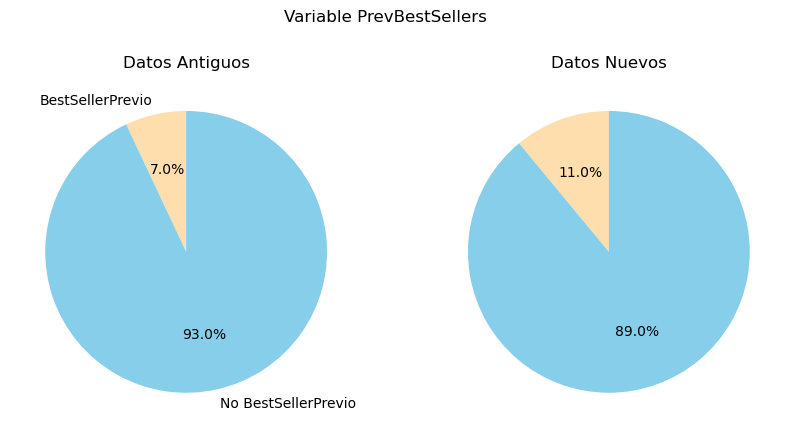

In [22]:
# Datos
labels = ['BestSellerPrevio', 'No BestSellerPrevio']
sizes_antiguos = [porc_prev_train, 100-porc_prev_train]
sizes_nuevos = [porc_prev_test, 100-porc_prev_test]

# Crear subplots con figura más grande
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Tamaño de la figura ajustado

# Gráfico para datos antiguos
axs[0].pie(sizes_antiguos, labels=labels, autopct='%1.1f%%', startangle=90, colors=c)
axs[0].set_title('Datos Antiguos')

# Gráfico para datos nuevos
axs[1].pie(sizes_nuevos, autopct='%1.1f%%', startangle=90,colors=c)
axs[1].set_title('Datos Nuevos')

plt.suptitle('Variable PrevBestSellers')
plt.show()

Vamos a realizar ahora el mismo análisis pero teniendo en cuenta si los libros son bestsellers o no

In [23]:
df_bs_train = df_train[df_train['Bestseller'] == 1]
df_bs_test = df_test[df_test['Bestseller'] == 1]

df_nbs_train = df_train[df_train['Bestseller'] == 0]
df_nbs_test = df_test[df_test['Bestseller'] == 0]

Primero estudiamos los bestsellers previos para autores de libros bestsellers

In [24]:
prev_train = df_bs_train['hasPrevBS'].sum()
prev_test = df_bs_test['hasPrevBS'].sum()

porc_prev_train = round(prev_train/len(df_bs_train),3) *100
porc_prev_test = round(prev_test/len(df_bs_test),3) *100

print('Respecto a los libros bestsellers:')
print(f'En los datos antiguos, el {porc_prev_train}% de los autores habían escrito algún bestseller.')
print(f'En los datos nuevos, el {porc_prev_test}% de los autores han escrito algún bestseller.')

Respecto a los libros bestsellers:
En los datos antiguos, el 33.2% de los autores habían escrito algún bestseller.
En los datos nuevos, el 50.0% de los autores han escrito algún bestseller.


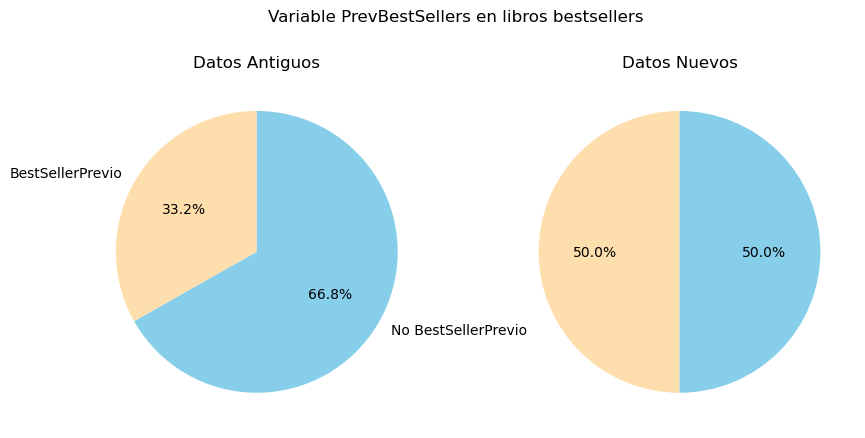

In [25]:
# Datos
labels = ['BestSellerPrevio', 'No BestSellerPrevio']
sizes_antiguos = [porc_prev_train, 100-porc_prev_train]
sizes_nuevos = [porc_prev_test, 100-porc_prev_test]

# Crear subplots con figura más grande
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Tamaño de la figura ajustado

# Gráfico para datos antiguos
axs[0].pie(sizes_antiguos, labels=labels, autopct='%1.1f%%', startangle=90, colors=c)
axs[0].set_title('Datos Antiguos')

# Gráfico para datos nuevos
axs[1].pie(sizes_nuevos, autopct='%1.1f%%', startangle=90,colors=c)
axs[1].set_title('Datos Nuevos')

plt.suptitle('Variable PrevBestSellers en libros bestsellers')
plt.show()

A continuación estudiamos los bestsellers previos para autores de libros no bestsellers

In [26]:
prev_train = df_nbs_train['hasPrevBS'].sum()
prev_test = df_nbs_test['hasPrevBS'].sum()

porc_prev_train = round(prev_train/len(df_nbs_train),3) *100
porc_prev_test = round(prev_test/len(df_nbs_test),3) *100

print('Respecto a los libros no bestsellers:')
print(f'En los datos antiguos, el {porc_prev_train}% de los autores habían escrito algún bestseller.')
print(f'En los datos nuevos, el {porc_prev_test}% de los autores han escrito algún bestseller.')

Respecto a los libros no bestsellers:
En los datos antiguos, el 2.9000000000000004% de los autores habían escrito algún bestseller.
En los datos nuevos, el 3.3000000000000003% de los autores han escrito algún bestseller.


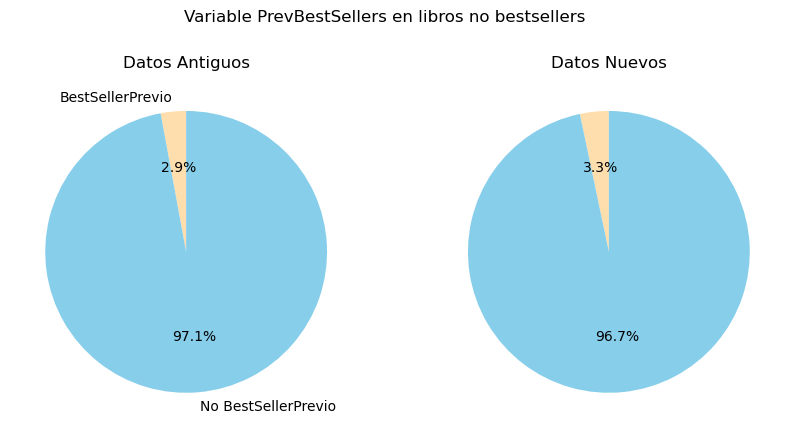

In [27]:
# Datos
labels = ['BestSellerPrevio', 'No BestSellerPrevio']
sizes_antiguos = [porc_prev_train, 100-porc_prev_train]
sizes_nuevos = [porc_prev_test, 100-porc_prev_test]

# Crear subplots con figura más grande
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Tamaño de la figura ajustado

# Gráfico para datos antiguos
axs[0].pie(sizes_antiguos, labels=labels, autopct='%1.1f%%', startangle=90, colors=c)
axs[0].set_title('Datos Antiguos')

# Gráfico para datos nuevos
axs[1].pie(sizes_nuevos, autopct='%1.1f%%', startangle=90,colors=c)
axs[1].set_title('Datos Nuevos')

plt.suptitle('Variable PrevBestSellers en libros no bestsellers')
plt.show()

Estudiamos la distribución de la variable PrevBestSellers

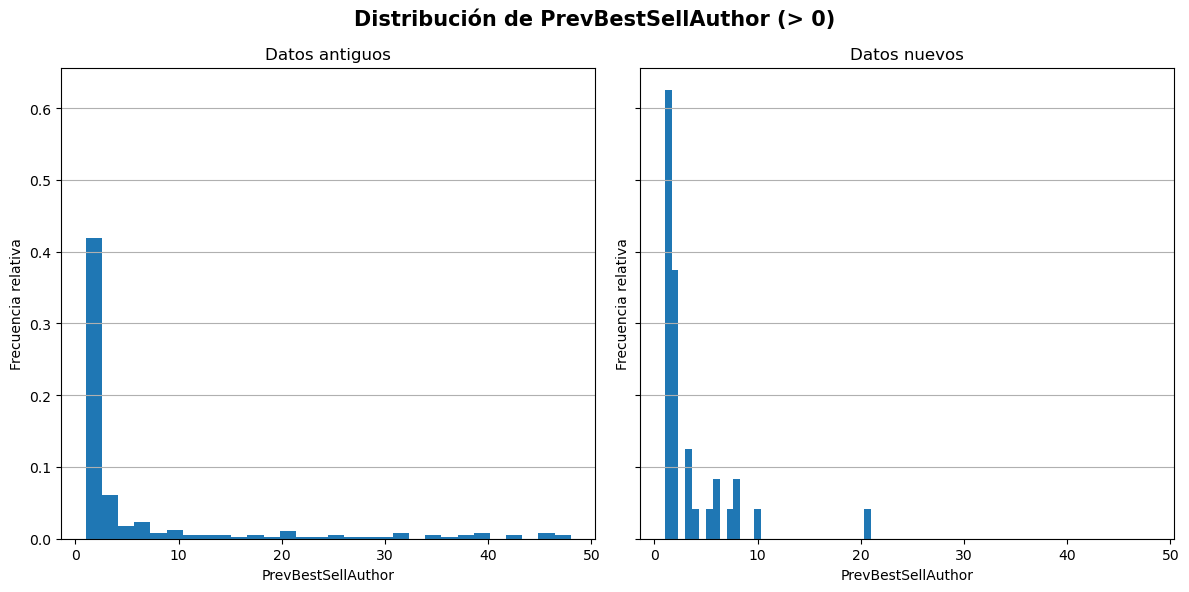

In [28]:
# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex = "all", sharey = "all")

# Histograma de frecuencia relativa para datos antiguos
nbins = 30
filtro = df_train['hasPrevBS'] == 1

axs[0].hist(df_train[filtro]['PrevBestSellAuthor'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[0].set_title('Datos antiguos')
axs[0].set_xlabel('PrevBestSellAuthor')
axs[0].set_ylabel('Frecuencia relativa')
axs[0].grid(axis='y')

# Histograma de frecuencia relativa para datos nuevos
filtro = df_test['hasPrevBS'] == 1

axs[1].hist(df_test[filtro]['PrevBestSellAuthor'], bins=nbins, density=True)  # density=True para frecuencia relativa
axs[1].set_title('Datos nuevos')
axs[1].set_xlabel('PrevBestSellAuthor')
axs[1].set_ylabel('Frecuencia relativa')
axs[1].grid(axis='y')

plt.suptitle("Distribución de PrevBestSellAuthor (> 0)", fontsize = 15, fontweight = "bold")
# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [29]:
# Análisis descriptivo
filtro = df_train['hasPrevBS'] == 1
desc_train = df_train[filtro]['PrevBestSellAuthor'].describe()

filtro = df_test['hasPrevBS'] == 1
desc_test = df_test[filtro]['PrevBestSellAuthor'].describe()

# Crear un DataFrame con los resultados
df_bookInterest = pd.DataFrame({'Datos antiguos': desc_train, 'Datos nuevos': desc_test})
df_bookInterest

,Datos antiguos,Datos nuevos
count,253.000000,36.000000
mean,6.189723,3.250000
std,10.781542,3.886791
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,4.000000,3.250000
max,48.000000,21.000000


In [30]:
filtro = df_train['hasPrevBS'] == 1
PVSTrain = df_train[filtro]['PrevBestSellAuthor']
filtro = df_test['hasPrevBS'] == 1
PVSTest = df_test[filtro]['PrevBestSellAuthor']
realizarMWUTest(PVSTrain, PVSTest)


--- Prueba de Mann-Whitney U ---

Estadístico U: 4419.5
Valor p: 0.7587391817380821
No se puede rechazar que las muestras provienen de la misma población (no se rechaza la hipótesis nula)

